# Linear Regression TF Website

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3


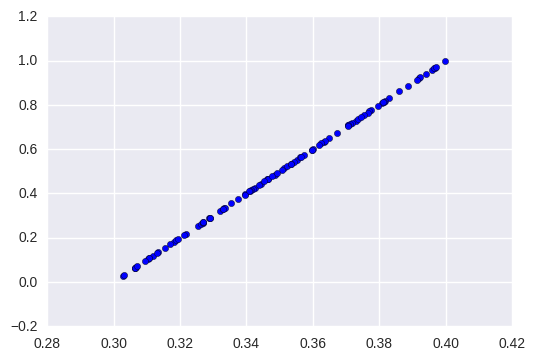

In [40]:
# n points 
n=100
x_data = np.random.rand(n).astype(np.float32)
y_data = x_data * 0.1 + 0.3
plt.scatter(y_data,x_data)

In [7]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)

In [44]:
# W is a random value between -1 and 1
# bias is intilaized as '0'
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

### Minimize the mean squared errors.


In [46]:
# Specify loss as Mean Square
loss = tf.reduce_mean(tf.square(y - y_data))
# optimizer as 
optimizer = tf.train.MomentumOptimizer(0.4,0.1)
### Try different optimizers.
#AdamOptimizer(0.5)
#AdadeltaOptimizer(0.7)
#GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

### The functionality of numpy.mean and tensorflow.reduce_mean are the same. They do the same thing.

In [47]:
c = np.array([[3.,4], [5.,6], [6.,7]])
print(np.mean(c,1))

Mean = tf.reduce_mean(c,1)
with tf.Session() as sess:
    result = sess.run(Mean)
    print(result)

[ 3.5  5.5  6.5]
[ 3.5  5.5  6.5]


### Before starting, initialize the variables.  We will 'run' this first.


In [29]:
init = tf.initialize_all_variables()

### Launch the graph.


In [30]:
sess = tf.Session()
sess.run(init)

### Fit the line.


In [31]:
### Learns best fit is W: [0.1], b: [0.3]

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))


0 [-0.50652224] [ 0.57743114]
20 [-0.08523688] [ 0.39002451]
40 [ 0.04283041] [ 0.32778424]
60 [ 0.08235576] [ 0.30857506]
80 [ 0.09455445] [ 0.30264655]
100 [ 0.09831934] [ 0.3008168]
120 [ 0.09948129] [ 0.30025211]
140 [ 0.0998399] [ 0.30007783]
160 [ 0.09995058] [ 0.30002403]
180 [ 0.09998474] [ 0.30000743]
200 [ 0.0999953] [ 0.30000231]


### PLOT fit and original data

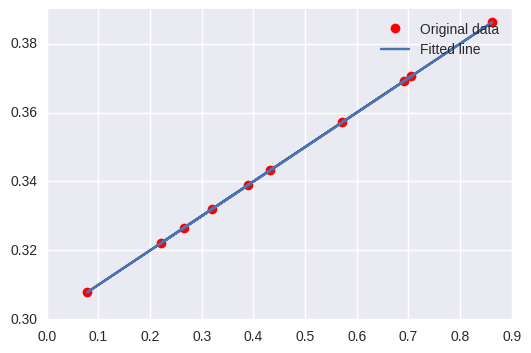

In [39]:
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
plt.legend()
plt.show()